In [1]:
# Import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Create the path to load the file
all_map_data_path = Path("Resources/merged_data.csv")

# Store the data into a dataframe
all_map_df = pd.read_csv(all_map_data_path, encoding="ISO-8859-1")
all_map_df.head()

,name,gender,teacher,ethnicity,sped,lep,ed,gt,dyslexia,fa_16,...,sp_20,fa_20,wi_21,sp_21,fa_21,wi_22,sp_22,fa_22,wi_23,sp_23
0,Molly Mora,F,Kirby,A,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,209.0,208.0,215.0,220.0,227.0,227.0,228.0,228.0,233.0
1,Kennedy Black,F,Gates,H,NaN,0,F,NaN,NaN,NaN,...,NaN,194.0,198.0,207.0,206.0,210.0,211.0,216.0,216.0,215.0
2,Nikolai Warren,M,Gates,A,NaN,M5,NaN,NaN,NaN,NaN,...,NaN,217.0,216.0,221.0,228.0,229.0,231.0,225.0,236.0,240.0
3,Efrain Meza,M,Lawrence,W,NaN,ESL,F,NaN,NaN,NaN,...,NaN,184.0,197.0,201.0,192.0,211.0,216.0,213.0,222.0,219.0
4,Valentino Houston,M,Kirby,W,NaN,NaN,NaN,Y,NaN,NaN,...,NaN,214.0,228.0,236.0,230.0,239.0,244.0,233.0,235.0,246.0


In [3]:
# Drop Fall 2016 - Spring 2022, ED
columns_to_drop = ['ed','fa_16', 'wi_17', 'sp_17', 'wi_18', 'sp_18', 'wi_19', 'sp_19', 'fa_19', 'wi_20', 'sp_20', 'fa_20', 'wi_21','sp_21','fa_21','wi_22','wi_22','sp_22']
all_map_df = all_map_df.drop(columns_to_drop, axis=1)
all_map_df.head()

,name,gender,teacher,ethnicity,sped,lep,gt,dyslexia,fa_22,wi_23,sp_23
0,Molly Mora,F,Kirby,A,NaN,NaN,NaN,NaN,228.0,228.0,233.0
1,Kennedy Black,F,Gates,H,NaN,0,NaN,NaN,216.0,216.0,215.0
2,Nikolai Warren,M,Gates,A,NaN,M5,NaN,NaN,225.0,236.0,240.0
3,Efrain Meza,M,Lawrence,W,NaN,ESL,NaN,NaN,213.0,222.0,219.0
4,Valentino Houston,M,Kirby,W,NaN,NaN,Y,NaN,233.0,235.0,246.0


In [7]:
# Select SpEd students
sped_only_df = all_map_df[all_map_df['sped'] == 'Y']
sped_only_df.head()

,name,gender,teacher,ethnicity,sped,lep,gt,dyslexia,fa_22,wi_23,sp_23
9,Josiah Bowers,M,Lawrence,H,Y,ESL,NaN,NaN,208.0,215.0,223.0
13,Alfonso Vega,M,Gates,H,Y,ESL,NaN,NaN,201.0,208.0,219.0
28,Paisley Salinas,F,Lawrence,H,Y,ESL,NaN,Y,203.0,207.0,222.0
31,Jimmy Stein,M,Lawrence,H,Y,NaN,NaN,NaN,NaN,NaN,179.0
38,Hezekiah Villarreal,M,Lawrence,H,Y,ESL,NaN,NaN,192.0,200.0,203.0


In [8]:
# Calculate the average of 'fa_22', 'wi_23', and 'sp_23' columns and create a new 'average' column
sped_only_df['2022-2023 map avg'] = sped_only_df[['fa_22', 'wi_23', 'sp_23']].mean(axis=1)
sped_only_df.head()


/var/folders/16/y_h1pm0n0vnc3q_20j94qf5c0000gn/T/ipykernel_9871/2480902605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sped_only_df['2022-2023 map avg'] = sped_only_df[['fa_22', 'wi_23', 'sp_23']].mean(axis=1)


,name,gender,teacher,ethnicity,sped,lep,gt,dyslexia,fa_22,wi_23,sp_23,2022-2023 map avg
9,Josiah Bowers,M,Lawrence,H,Y,ESL,NaN,NaN,208.0,215.0,223.0,215.333333
13,Alfonso Vega,M,Gates,H,Y,ESL,NaN,NaN,201.0,208.0,219.0,209.333333
28,Paisley Salinas,F,Lawrence,H,Y,ESL,NaN,Y,203.0,207.0,222.0,210.666667
31,Jimmy Stein,M,Lawrence,H,Y,NaN,NaN,NaN,NaN,NaN,179.0,179.000000
38,Hezekiah Villarreal,M,Lawrence,H,Y,ESL,NaN,NaN,192.0,200.0,203.0,198.333333


In [12]:
# Calculating SpEd total average for fall, winter, and spring
# Calculate average of fa_22
fa_22_avg = sped_only_df['fa_22'].mean()

# Calculate average of wi_23
wi_23_avg = sped_only_df['wi_23'].mean()

# Calculate average of sp_23
sp_23_avg = sped_only_df['sp_23'].mean()

# Print the averages for 2022_2023
print("Fall 2022 SpEd MAP Average:", fa_22_avg, 
      "Winter SpEd MAP Average:", wi_23_avg, 
      "Spring 2023 SpEd MAP Average:",sp_23_avg )

Fall 2022 SpEd MAP Average: 206.85714285714286 Winter SpEd MAP Average: 213.31428571428572 Spring 2023 SpEd MAP Average: 217.4857142857143


In [15]:
# Select Non-SpEd students
non_sped_df = all_map_df[all_map_df['sped'].isnull() | (all_map_df['sped'] == '')]
non_sped_df.head()

,name,gender,teacher,ethnicity,sped,lep,gt,dyslexia,fa_22,wi_23,sp_23
0,Molly Mora,F,Kirby,A,NaN,NaN,NaN,NaN,228.0,228.0,233.0
1,Kennedy Black,F,Gates,H,NaN,0,NaN,NaN,216.0,216.0,215.0
2,Nikolai Warren,M,Gates,A,NaN,M5,NaN,NaN,225.0,236.0,240.0
3,Efrain Meza,M,Lawrence,W,NaN,ESL,NaN,NaN,213.0,222.0,219.0
4,Valentino Houston,M,Kirby,W,NaN,NaN,Y,NaN,233.0,235.0,246.0


In [16]:
# Calculate the average of 'fa_22', 'wi_23', and 'sp_23' columns and create a new 'average' column
non_sped_df['2022-2023 map avg'] = non_sped_df[['fa_22', 'wi_23', 'sp_23']].mean(axis=1)
non_sped_df.head()


/var/folders/16/y_h1pm0n0vnc3q_20j94qf5c0000gn/T/ipykernel_9871/3704929726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_sped_df['2022-2023 map avg'] = non_sped_df[['fa_22', 'wi_23', 'sp_23']].mean(axis=1)


,name,gender,teacher,ethnicity,sped,lep,gt,dyslexia,fa_22,wi_23,sp_23,2022-2023 map avg
0,Molly Mora,F,Kirby,A,NaN,NaN,NaN,NaN,228.0,228.0,233.0,229.666667
1,Kennedy Black,F,Gates,H,NaN,0,NaN,NaN,216.0,216.0,215.0,215.666667
2,Nikolai Warren,M,Gates,A,NaN,M5,NaN,NaN,225.0,236.0,240.0,233.666667
3,Efrain Meza,M,Lawrence,W,NaN,ESL,NaN,NaN,213.0,222.0,219.0,218.000000
4,Valentino Houston,M,Kirby,W,NaN,NaN,Y,NaN,233.0,235.0,246.0,238.000000


In [18]:
# Calculating Non-SpEd total average for fall, winter, and spring
# Calculate average of fa_22
fa_22_avg = non_sped_df['fa_22'].mean()

# Calculate average of wi_23
wi_23_avg = non_sped_df['wi_23'].mean()

# Calculate average of sp_23
sp_23_avg = non_sped_df['sp_23'].mean()

# Print the averages for 2022_2023
print("Fall 2022 Non-SpEd MAP Average:", fa_22_avg, 
      "Winter Non-SpEd MAP Average:", wi_23_avg, 
      "Spring 2023 Non-SpEd MAP Average:",sp_23_avg )

Fall 2022 Non-SpEd MAP Average: 219.2110552763819 Winter Non-SpEd MAP Average: 223.4729064039409 Spring 2023 Non-SpEd MAP Average: 228.490099009901


In [21]:
# Create dictionary with SpEd and Non-SpEd Averages
latest_year_avg = {
    'MAP': ['Fall 2022', 'Winter 2023', 'Spring 2023'],
    'SpEd MAP Average': [206.85, 213.31,217.48],
    'Non-SpEd MAP Average': [219.21,223.47,228.49]
}

# Convert dictionary into a DataFrame
latest_year_df = pd.DataFrame(latest_year_avg)
latest_year_df


,MAP,SpEd MAP Average,Non-SpEd MAP Average
0,Fall 2022,206.85,219.21
1,Winter 2023,213.31,223.47
2,Spring 2023,217.48,228.49


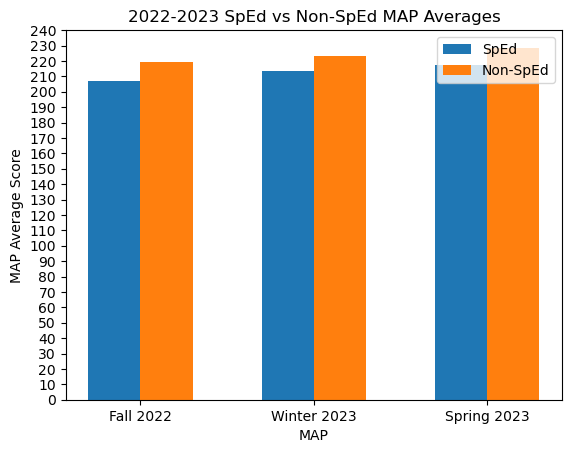

In [35]:
# Create a Bar Graph comparing SpEd vs Non-Sped for 2022-2023
plt.bar(x, latest_year_df['SpEd MAP Average'], width=bar_width, label='SpEd')
plt.bar([i + bar_width for i in x], latest_year_df['Non-SpEd MAP Average'], width=bar_width, label='Non-SpEd')

# Specify the desired y-tick positions
plt.yticks([i for i in range(0, 250, 10)])  # Adjust this range as needed

plt.xticks([i + bar_width / 2 for i in x], latest_year_df['MAP'])
plt.xlabel('MAP')
plt.ylabel('MAP Average Score')
plt.title('2022-2023 SpEd vs Non-SpEd MAP Averages')
plt.legend()
plt.show()